In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sci
from matricesAleatorias import matham as mh
from tqdm import tqdm

# Matriz Grande

In [13]:
nmat= 10000
Hmat = mh.MatrizHamiltoniana(nmat)
densidadmat = mh.DensidadesHam(nmat,2)

In [5]:
HGUEmat = Hmat.GUE()

In [7]:
HGUEmat = pd.read_csv("~/Desktop/Graficos Reporte/EvalsGUE.dat")

(10000,)

In [8]:
HGUEmat = np.array(HGUEmat["GUEEvals"])

In [14]:
Evalsmat = HGUEmat #np.linalg.eigvalsh(HGUEmat)
EvalsNormmat = Evalsmat / np.sqrt(nmat)

In [15]:
#Se extrae un porcentaje de los eigenvalores

mmat = int(nmat/6)
EvalsLinmat = Evalsmat[mmat:-mmat]
EvalsLinNormmat = EvalsNormmat[mmat:-mmat]

In [16]:
#Construcción de los dominios de los eigenvalores lineales
Dommat = np.linspace(mmat,EvalsLinmat.size+mmat,EvalsLinmat.size)
DomNormmat = np.linspace(mmat,EvalsLinNormmat.size+mmat,EvalsLinNormmat.size)

In [17]:
#Se calculan los espaciamientos no normalizados
Espaciamientosmat = np.diff(EvalsLinmat)
deltamat = Espaciamientosmat.mean()
Smat = Espaciamientosmat / deltamat

In [18]:
rmat = (Evalsmat[1:-1] - Evalsmat[2:]) / (Evalsmat[:-2] - Evalsmat[1:-1])

In [19]:
Porcentajemat = 100 - 200*mmat/nmat
Porcentajemat

66.68

# Ensamble

In [47]:
nens = 100
nsamp = 100000

In [21]:
Hens = mh.MatrizHamiltoniana(nens)
densidadens = mh.DensidadesHam(nsamp,2)

In [22]:
EvalEns = []

In [23]:
for i in range(nsamp):
    HGUEens = Hens.GUE()
    eval = np.linalg.eigvalsh(HGUEens)
    eval = eval / np.sqrt(nens)
    EvalEns.append(eval)

KeyboardInterrupt: 

In [58]:
EvalEns = np.array(pd.read_csv("~/Desktop/Graficos Reporte/EvalsGUEEns.dat")).reshape((10000000))#np.concatenate(EvalEns)

In [59]:
rens = []

In [60]:
for i in range(int(nsamp/nens)):
    EvalSamp = EvalEns[0+i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    rens.append(rsamp)

In [61]:
rens = np.concatenate(rens)

In [62]:
mens = int(nens/6)
Porcentajeens = 100 - 200*mens/nens
Porcentajeens

68.0

In [63]:
EvalEns.shape

(10000000,)

In [64]:
Sens = []

In [65]:
for i in range(int(nsamp/nens)):
    EvalSamp = EvalEns[0+i*100:100 + i*100]
    EvalSampLin = EvalSamp[mens:-mens]
    EspaSamp = np.diff(EvalSampLin)
    deltaSamp = EspaSamp.mean()
    Ssamp = EspaSamp / deltaSamp
    Sens.append(Ssamp)

In [66]:
Sens = np.concatenate(Sens)
Sens

array([1.11157355, 0.7808443 , 1.40670247, ..., 0.87261914, 0.71893395,
       1.20423588])

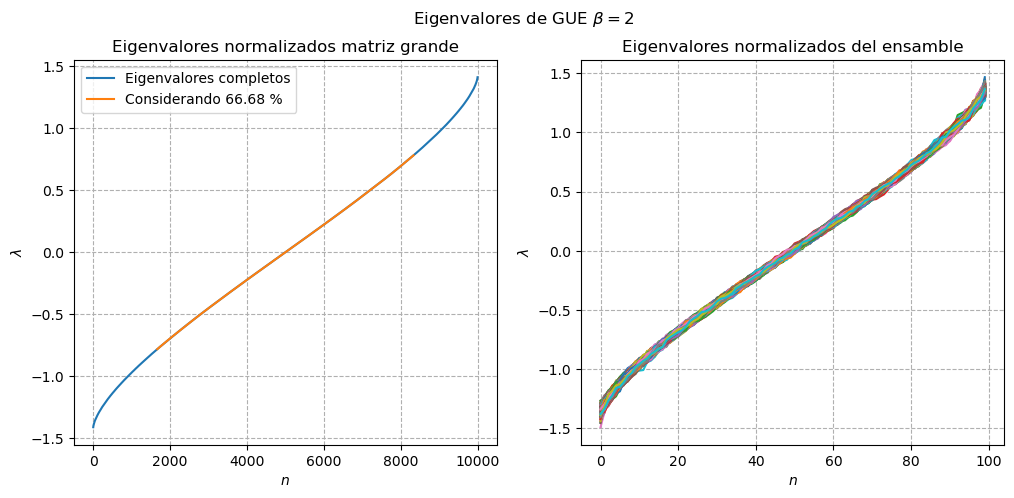

In [67]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle(r'Eigenvalores de GUE $ \beta=2 $')

ax[0].plot(EvalsNormmat,label='Eigenvalores completos')
ax[0].plot(DomNormmat,EvalsLinNormmat,label=f'Considerando {Porcentajemat} %')
ax[0].set_title('Eigenvalores normalizados matriz grande')
ax[0].grid(True,linestyle='--')
ax[0].legend()
ax[0].set_xlabel(r'$ n $')
ax[0].set_ylabel(r'$ \lambda $')

for i in range(int(nsamp/nens)):
    ax[1].plot(EvalEns[0+i*100:100 + i*100])
ax[1].set_title('Eigenvalores normalizados del ensamble')
ax[1].grid(True,linestyle='--')
ax[1].set_xlabel(r'$ n $')
ax[1].set_ylabel(r'$ \lambda $')

plt.savefig('EigenvaloresGUE.png',dpi=300)

# Ley del Semi-circulo

In [68]:
xnormmat = np.linspace(EvalsNormmat.min(),EvalsNormmat.max(),nmat)
plamNormmat = densidadmat.SemiCicle(xnormmat)

In [69]:
xlamens = np.linspace(-1.5,1.5,1000)
plamens = densidadens.SemiCicle(xlamens)

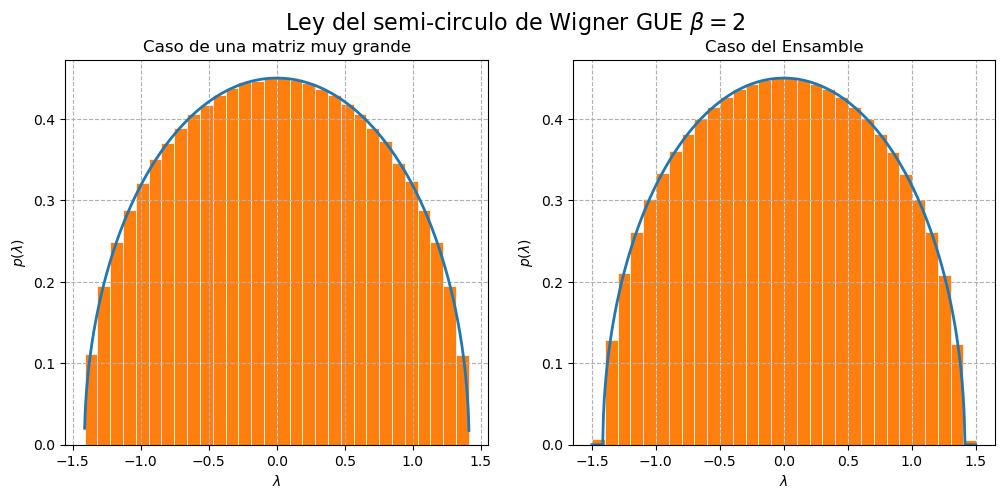

In [70]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle(r'Ley del semi-circulo de Wigner GUE $ \beta=2 $',fontsize=16)

ax[0].plot(xnormmat,plamNormmat,lw=2)
ax[0].hist(EvalsNormmat,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ \lambda $')
ax[0].set_ylabel(r'$ p(\lambda) $')

ax[1].plot(xlamens,plamens,lw=2)
ax[1].hist(EvalEns,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ \lambda $')
ax[1].set_ylabel(r'$ p(\lambda) $')

plt.savefig('Semi-CirculoGUE.png',dpi=300)

In [71]:
sfunmat = np.linspace(0,5,100)
psmat = densidadmat.Ps(sfunmat)

In [72]:
xsens = np.linspace(0,5,1000)
psens = densidadens.Ps(xsens)

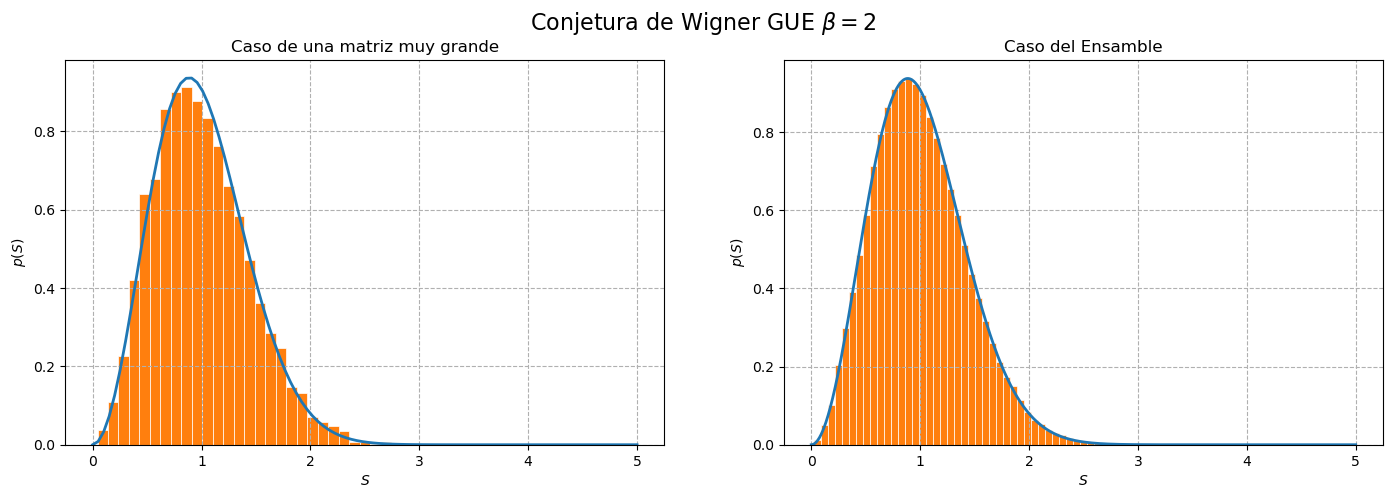

In [73]:
fig, ax = plt.subplots(1,2,figsize=(17,5))

fig.suptitle(r'Conjetura de Wigner GUE $ \beta=2 $',fontsize=16)

ax[0].plot(sfunmat,psmat,lw=2)
ax[0].hist(Smat,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ S $')
ax[0].set_ylabel(r'$ p(S) $')

ax[1].plot(xsens,psens,lw=2)
ax[1].hist(Sens,bins=50,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ S $')
ax[1].set_ylabel(r'$ p(S) $')

plt.savefig('ConjeturaWignerGUE.png',dpi=300)

# Razón de espaciamientos

In [74]:
xrmat = np.linspace(0,10,1000)
prmat = densidadmat.Pr(xrmat)

In [75]:
xrens = np.linspace(0,10,1000)
prens = densidadens.Pr(xrens)

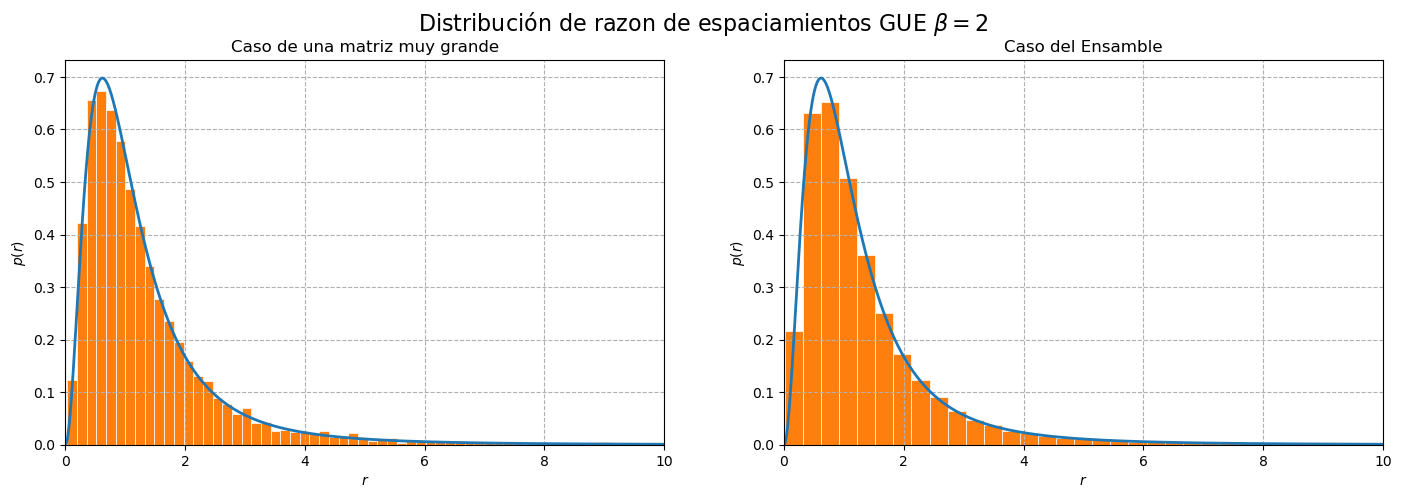

In [76]:
fig, ax = plt.subplots(1,2,figsize=(17,5))

fig.suptitle(r'Distribución de razon de espaciamientos GUE $ \beta=2 $',fontsize=16)

ax[0].plot(xrmat,prmat,lw=2)
ax[0].hist(rmat,bins=200,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ r $')
ax[0].set_ylabel(r'$ p(r) $')
ax[0].set_xlim(0,10)

ax[1].plot(xrens,prens,lw=2)
ax[1].hist(rens,bins=300,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ r $')
ax[1].set_ylabel(r'$ p(r) $')
ax[1].set_xlim(0,10)

plt.savefig('prGUE.png',dpi=300)

In [80]:
def cdfSemi(x):
    resultado, _=sci.integrate.quad(densidadens.Pr,0,x)
    return resultado

In [82]:
cdfSemi = np.vectorize(cdfSemi)

In [83]:
sci.stats.kstest(rens,cdfSemi)

KstestResult(statistic=np.float64(0.0030902575946051836), pvalue=np.float64(0.3059669969858998), statistic_location=np.float64(0.6528913173273542), statistic_sign=np.int8(1))

In [84]:
rens.mean()

np.float64(1.3667478480262618)

In [85]:
rens.std()

np.float64(1.4851946371453904)

In [87]:
sci.stats.moment(rens,4)

np.float64(1409.689725257709)